In [1]:
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

sys.path.append("../")
from src.graph_preprocessing import load_graph_data
from src.features_extraction import feature_extractor, graph_feature_extractor, metadata_features_extractor

In [2]:
sub_graph, residual_g, train_samples, train_labels, test_samples, test_labels = load_graph_data("../experiments/0.4_0.8")

In [3]:
train_features = feature_extractor(sub_graph, train_samples, [graph_feature_extractor, metadata_features_extractor], node_information_path="../data/node_information.csv")
test_features = feature_extractor(sub_graph, test_samples, [graph_feature_extractor, metadata_features_extractor], node_information_path="../data/node_information.csv")

100%|██████████| 21242/21242 [00:03<00:00, 5564.15it/s]


# Classification

In [4]:
def prediction(train_features, test_features, train_labels, test_labels):
    """
    Downstream ML task using edge embeddings to classify them 
    """
    
    # --- Build the model and train it ---
    # Fill in the blanks
    
    lr = LogisticRegression()
    lr.fit(train_features, train_labels)
    
    train_preds = lr.predict_proba(train_features)[:, 1]
    test_preds = lr.predict_proba(test_features)[:, 1]
    
    print(test_preds)

    # --- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from predictions ---
    # Fill in the blanks
    fpr, tpr, _ = roc_curve(test_labels, test_preds)
    roc_auc = roc_auc_score(test_labels, test_preds)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return lr, roc_auc

[0.1372476  0.99494836 1.         ... 0.16268211 0.1050153  0.14612191]


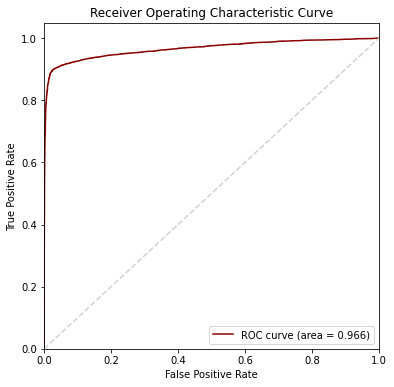

In [5]:
lr, roc_auc = prediction(train_features, test_features, train_labels, test_labels)

In [6]:
test_preds = lr.predict(test_features)
f1_score(test_labels, test_preds)

0.9319232661091982